### Jordan Bramble
### Statistical Learning
### Homework 2

## 3.7 Problem 3

##### a.
#### Y = 50 + 20(gpa) + 0.07(iq) + 35(gender) + 0.01(gpa x iq) - 10 (gpa x gender)
This is our Regression Equation 

notice that there is some interaction between GPA and gender. If GPA and IQ are equal for men and women then the differnce in salary is:

35 - 10(GPA). When GPA is higher than 3.5 Men make more on average. so the answer is iii.
    

##### b. 

Y = 50 + 20(4) + .07(110) + 35 + .01(4.0x110) - 10(4.0) = 137.1. I assume this to mean 137,000 per year. I certainly wish my starting salary was this high!!

##### c.

False, We would need to conduct a hypothesis test and evaluate the p-value on the regression coefficient to determine statistical significance.

## 3.7 Problem 4

a. We could expect the cubic regression to have a lower RSS because it can make a tighter fit to data with a wider epsilon

b. This would be the opposite of A, we would expect cubic regression to have a higher RSS because it could be susceptible to overfitting.

c. Cubic regression will have lower RSS. Since cubic regression allows for higher flexibility, it will always model better in training no matter what the actual relationship is

d. This question is harder to tell given the problem statement. Since we dont actually know how far the relationship is from linear. If it is more linear than cubic we could expect the linear regression to have lower RSS. OTherwsie we should expect the cubic regression to be lower.

## 3.7 Problem 8

##### a.

In [2]:
library(ISLR)

In [3]:
data(Auto)

In [4]:
Auto = na.omit(Auto)
Auto = Auto[!is.null(Auto),]

In [5]:
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11,70,1,plymouth satellite
4,16,8,304,150,3433,12,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10,70,1,ford galaxie 500


In [6]:
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

In [7]:
res = lm(Auto$mpg ~ Auto$horsepower)

In [8]:
summary(res)


Call:
lm(formula = Auto$mpg ~ Auto$horsepower)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     39.935861   0.717499   55.66   <2e-16 ***
Auto$horsepower -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


yes there is a relationship. the F-stat and p-value show this. RSE is about 4.1. this is about 17% error. Also the R_Squared is .606, so around 60% of the variance is explained by horsepower. We can also see that the relationship between the two is negative. as horsepower increases, MPG decreases. for 98 horsepower, we should predict about 24MPG

In [9]:
predict(res, data.frame(horsepower=c(98)), interval="confidence")[Auto$horsepower == 98,]

Warning message:
: 'newdata' had 1 row but variables found have 392 rows

,fit,lwr,upr
178,24.46708,23.97308,24.96108
227,24.46708,23.97308,24.96108


In [10]:
predict(res, data.frame(horsepower=c(98)), interval="prediction")[Auto$horsepower == 98,]

Warning message:
: 'newdata' had 1 row but variables found have 392 rows

,fit,lwr,upr
178,24.46708,14.80940,34.12476
227,24.46708,14.80940,34.12476


#### b. 

ERROR: Error in file(con, "rb"): cannot open the connection


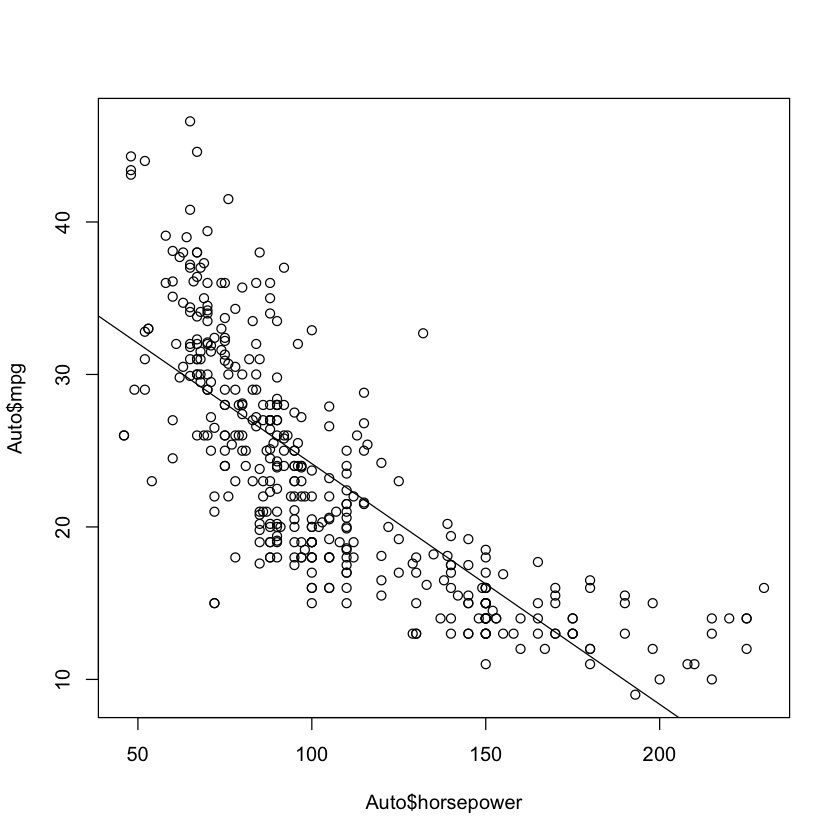

In [20]:
plot(Auto$horsepower, Auto$mpg)
abline(res)

ERROR: Error in file(con, "rb"): cannot open the connection


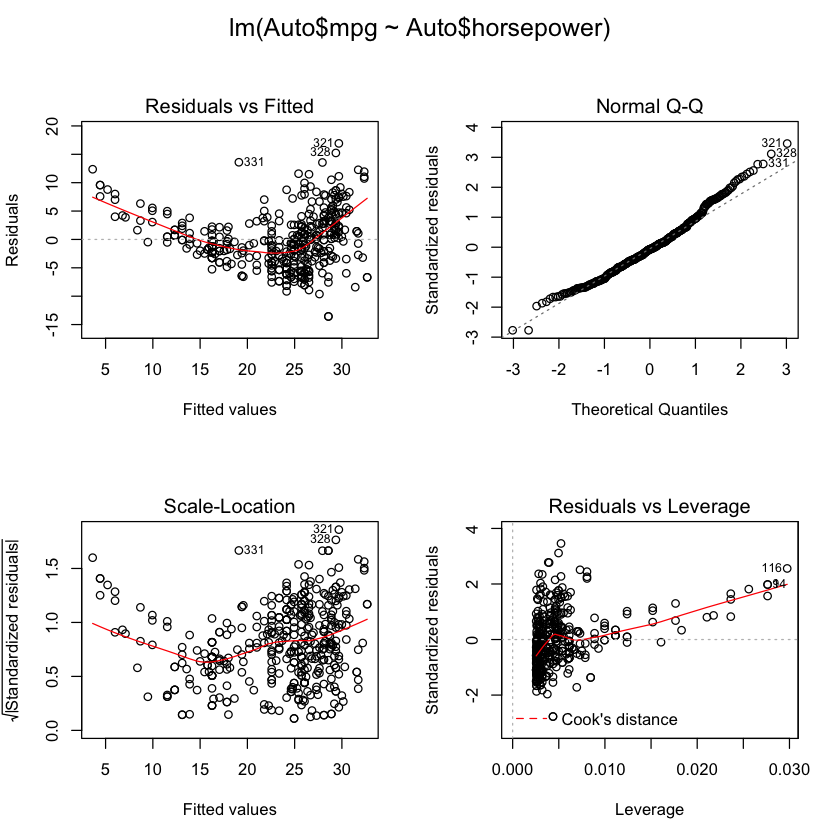

In [21]:
par(mfrow = c(2, 2), oma = c(0, 0, 2, 0))
plot(res)

The main takeaway here is that it appears there could be non-linearity at play

## 3.7 Problem 9

#### a. 

ERROR: Error in file(con, "rb"): cannot open the connection


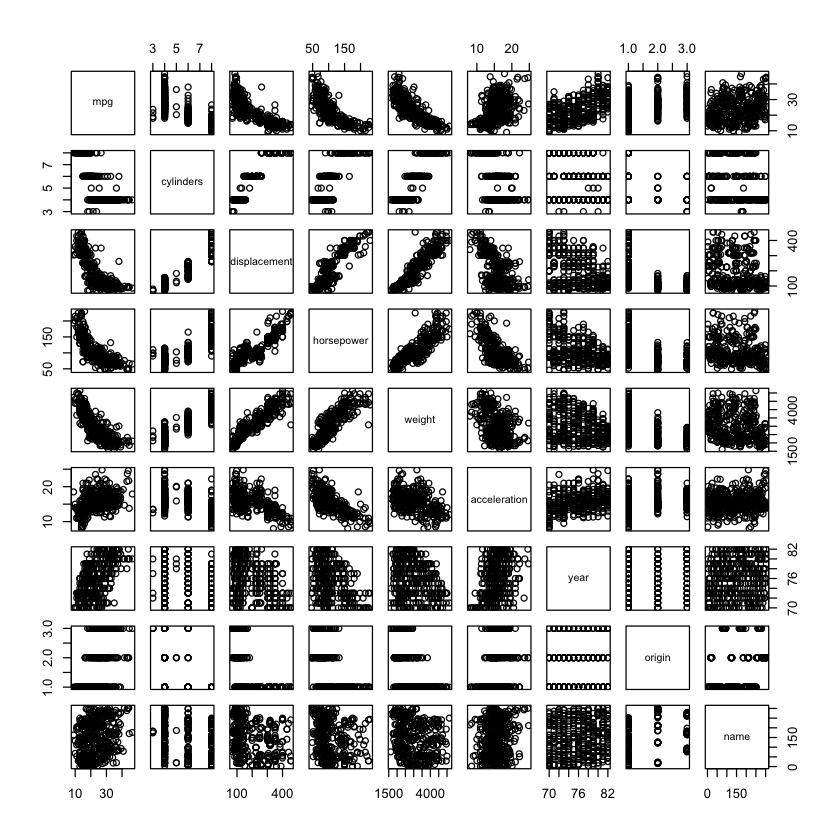

In [22]:
pairs(Auto)

##### b.

In [23]:
cor(subset(Auto, select=-name))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


##### c. 

In [11]:
res1 = lm(mpg~.-name, data=Auto)

In [12]:
summary(res1)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


Yes, there is clearly a relationship given that the F-statistic is quite high and p-value is essentially zero. We can see based on the p=values that weight, displacement, year and origin have a statistically significant relationship. the coefficient estimate for year suggest that as year increases, mpg increases. so new model cars are more fuel efficient.

##### d. 

ERROR: Error in file(con, "rb"): cannot open the connection


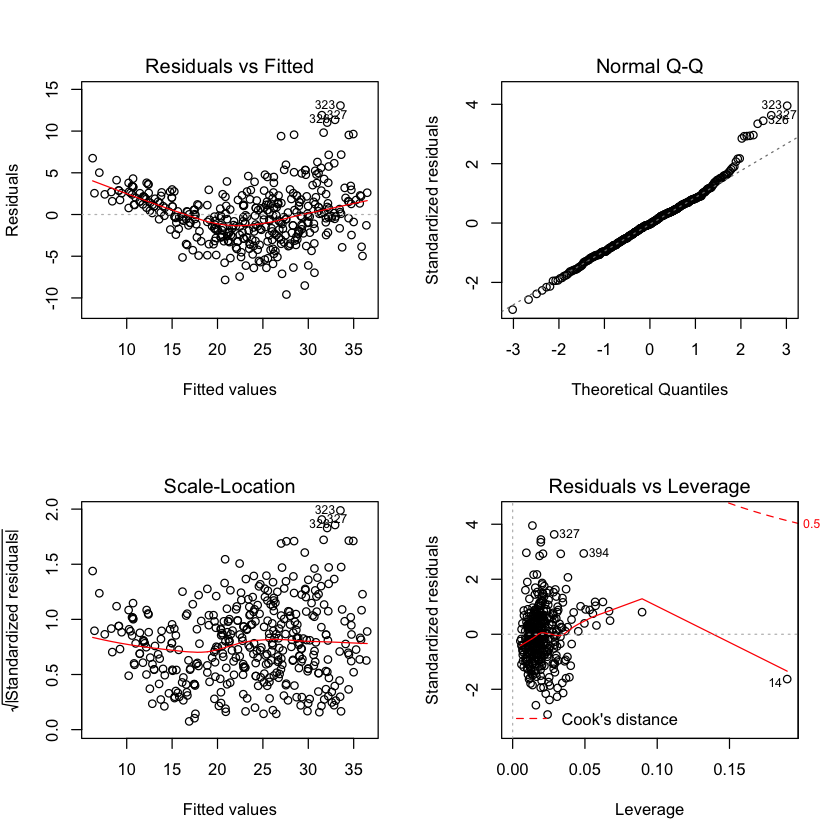

In [13]:
par(mfrow=c(2,2))
plot(res1)

The curve in the residual plot implies that this is not a good fit. Point 14 has a very high fegree of leverage.

##### e. 

In [14]:
res2 <- lm(mpg ~ cylinders * displacement+displacement * weight, data = Auto[, 1:8])
summary(res2)


Call:
lm(formula = mpg ~ cylinders * displacement + displacement * 
    weight, data = Auto[, 1:8])

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2934  -2.5184  -0.3476   1.8399  17.7723 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             5.262e+01  2.237e+00  23.519  < 2e-16 ***
cylinders               7.606e-01  7.669e-01   0.992    0.322    
displacement           -7.351e-02  1.669e-02  -4.403 1.38e-05 ***
weight                 -9.888e-03  1.329e-03  -7.438 6.69e-13 ***
cylinders:displacement -2.986e-03  3.426e-03  -0.872    0.384    
displacement:weight     2.128e-05  5.002e-06   4.254 2.64e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.103 on 386 degrees of freedom
Multiple R-squared:  0.7272,	Adjusted R-squared:  0.7237 
F-statistic: 205.8 on 5 and 386 DF,  p-value: < 2.2e-16


displacement and weight interaction appear to be statistically significant

##### f. 

In [18]:
res4 = lm(Auto$mpg~log(Auto$weight)+log(Auto$horsepower))
summary(res4)


Call:
lm(formula = Auto$mpg ~ log(Auto$weight) + log(Auto$horsepower))

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6665  -2.4028  -0.3842   2.1558  15.3359 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           179.973      7.420   24.25  < 2e-16 ***
log(Auto$weight)      -15.244      1.478  -10.32  < 2e-16 ***
log(Auto$horsepower)   -7.672      1.210   -6.34 6.36e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.993 on 389 degrees of freedom
Multiple R-squared:  0.7396,	Adjusted R-squared:  0.7382 
F-statistic: 552.4 on 2 and 389 DF,  p-value: < 2.2e-16


ERROR: Error in file(con, "rb"): cannot open the connection


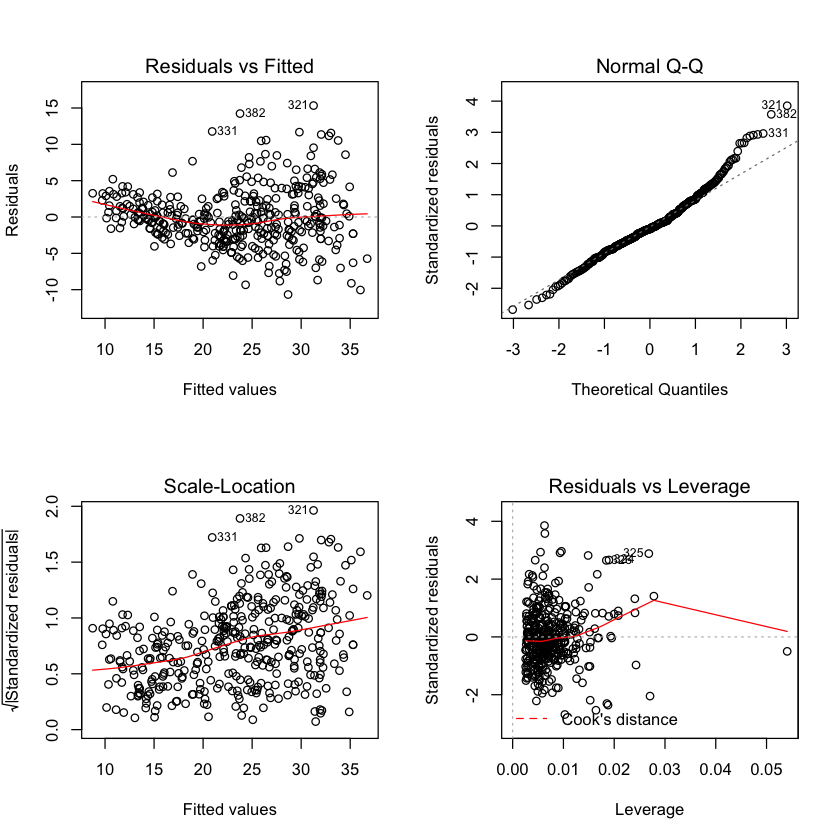

In [19]:
par(mfrow=c(2,2))
plot(res4)

This actually gives us quite a poor fit, but lets try using log(mpg) given that pair plots look logarithmic compared to other variables. lets not include origin or name since their relationsjhip is different

In [25]:
res5 <-lm(log(mpg)~cylinders+displacement+horsepower+weight+acceleration+year,data=Auto)

In [26]:
summary(res5)


Call:
lm(formula = log(mpg) ~ cylinders + displacement + horsepower + 
    weight + acceleration + year, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40553 -0.07249 -0.00023  0.07053  0.35502 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.8274891  0.1685082  10.845   <2e-16 ***
cylinders    -0.0232784  0.0117472  -1.982   0.0482 *  
displacement  0.0002874  0.0002603   1.104   0.2701    
horsepower   -0.0010020  0.0004894  -2.047   0.0413 *  
weight       -0.0002643  0.0000237 -11.151   <2e-16 ***
acceleration -0.0012140  0.0036092  -0.336   0.7368    
year          0.0296495  0.0018612  15.930   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1215 on 385 degrees of freedom
Multiple R-squared:  0.8743,	Adjusted R-squared:  0.8723 
F-statistic: 446.2 on 6 and 385 DF,  p-value: < 2.2e-16


ERROR: Error in file(con, "rb"): cannot open the connection


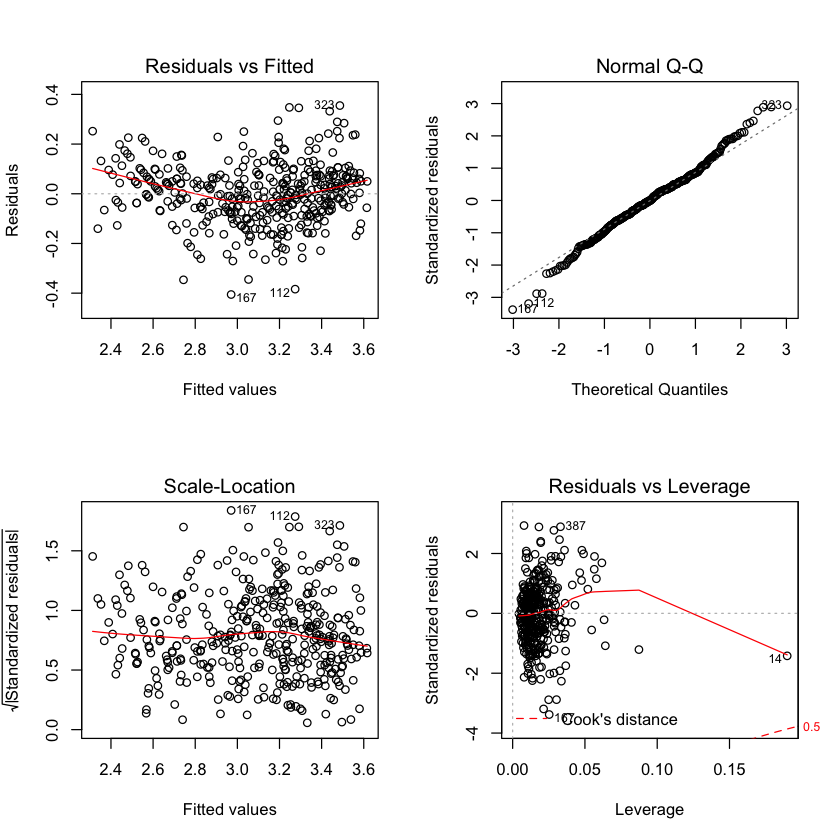

In [27]:
par(mfrow=c(2,2))
plot(res5)

We can see that the above has allowed us to improve the R~Squared quite a bit, and given a better fit.

## 3.7 Problem 12

##### a. 

The estimate of X onto Y will have the same coefficient as Y onto X when the sum of squares of observed x and y are equal

##### b. 

In [30]:
X = rnorm(100)
Y = X^2
res = data.frame(X,Y)
summary(lm(Y~X, data = res))


Call:
lm(formula = Y ~ X, data = res)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9144 -0.8091 -0.3867  0.4089  3.3063 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.91458    0.10490   8.718 7.27e-14 ***
X            0.03449    0.10977   0.314    0.754    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.048 on 98 degrees of freedom
Multiple R-squared:  0.001006,	Adjusted R-squared:  -0.009187 
F-statistic: 0.09873 on 1 and 98 DF,  p-value: 0.754


##### c. 

In [33]:
X = rnorm(100)
Y = sample(X,size = 100, replace = F)
# I suspect we could do Y = X but that throws a warning
train = data.frame(X,Y)
summary(lm(Y~X, data = train))


Call:
lm(formula = Y ~ X, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.38387 -0.78065  0.00809  0.64372  2.71191 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.2521     0.1040  -2.424   0.0172 *
X            -0.1010     0.1005  -1.005   0.3172  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.014 on 98 degrees of freedom
Multiple R-squared:  0.01021,	Adjusted R-squared:  0.0001087 
F-statistic: 1.011 on 1 and 98 DF,  p-value: 0.3172
